In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\ikesh\Downloads\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.shape

(200, 4)

# EDA

In [7]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

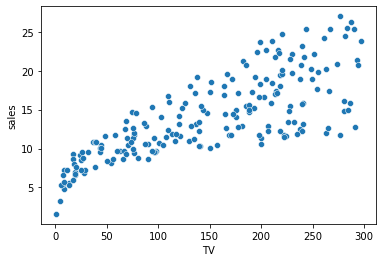

In [8]:
sns.scatterplot(data=df,x="TV",y="sales")
plt.show()

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

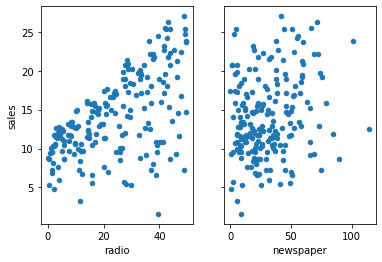

In [9]:
fig, axs = plt.subplots(1,2,sharey = True)
df.plot(kind='scatter', x='radio', y ='sales', ax=axs[0])
df.plot(kind='scatter',x='newspaper',y='sales', ax=axs[1])

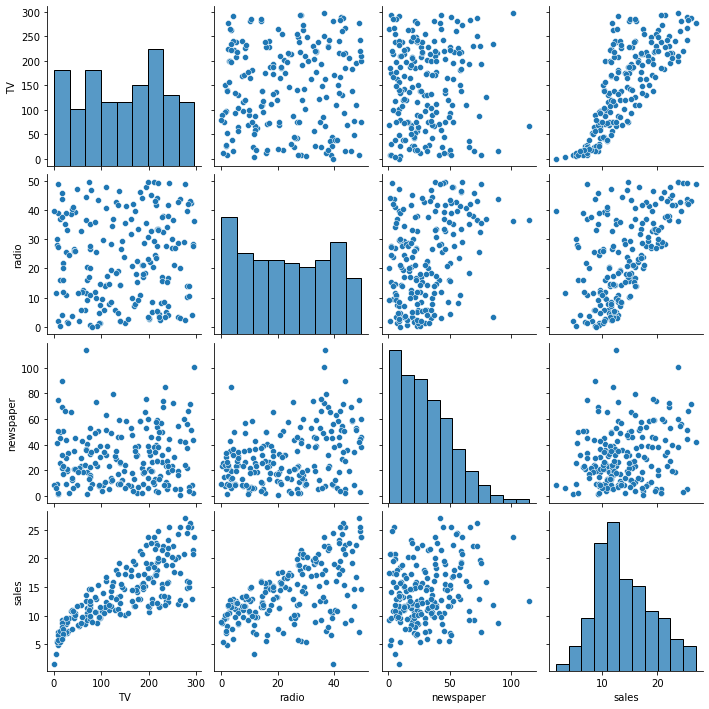

In [10]:
sns.pairplot(df)
plt.show()

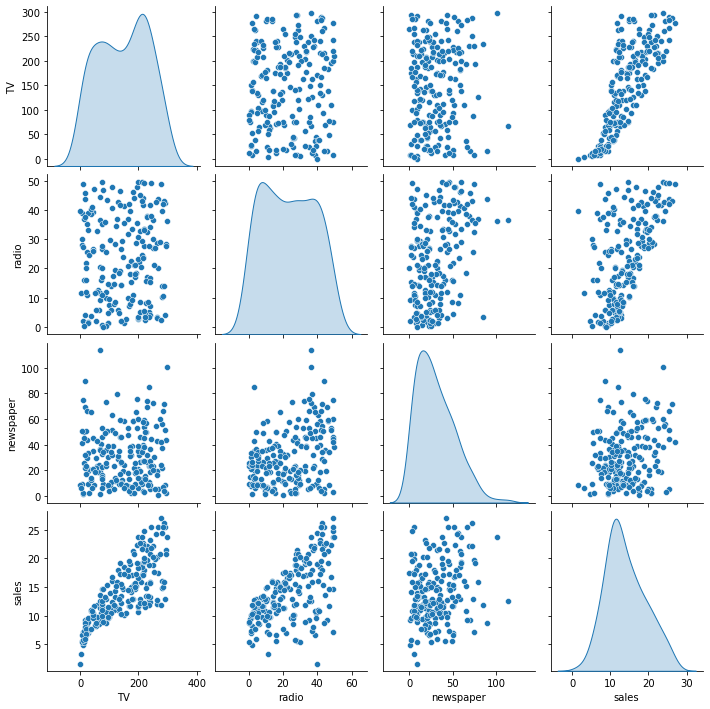

In [11]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [13]:
x = df.drop('sales',axis=1)
y = df['sales']

In [14]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [15]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=7, test_size=0.3)

# Modelling

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
model.intercept_

2.5971913990213036

In [19]:
model.coef_

array([ 4.71259657e-02,  1.90987993e-01, -1.93812266e-05])

# Predictions

In [20]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

# Evaluation

In [21]:
train_res = y_train-train_pred
test_res = y_test-test_pred

In [22]:
model.score(x_train,y_train)

0.8970470429900155

In [23]:
model.score(x_test,y_test)

0.8894586465158203

In [24]:
import joblib

In [25]:
joblib.dump(model,"regressor.pkl")

['regressor.pkl']

In [26]:
trial = df.copy()

In [27]:
trial.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [28]:
final = trial.drop("sales", axis=1)

In [29]:
n = trial["sales"]

In [30]:
n

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [31]:
final

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [32]:
final_model = joblib.load("regressor.pkl")

In [33]:
final_model

LinearRegression()

In [34]:
final_model.predict(final)

array([20.65888105, 12.1992509 , 12.17276377, 17.62344551, 13.17910445,
       12.34504657, 11.57088514, 12.00487231,  3.40353011, 12.50911724,
        6.81947906, 17.29877053, 10.42119071,  8.64334225, 18.49821442,
       20.91470709, 12.78028296, 23.42048119,  9.7732074 , 14.10308899,
       18.17883475, 14.75847895,  6.25500193, 16.58323865,  7.93923309,
       15.65468781, 14.92719588, 17.10119141, 19.49746243,  8.97930171,
       21.80450967, 11.24015588,  7.46373581, 18.93360192,  7.37438608,
       17.07959565, 23.54028882, 15.55142217,  9.72701965, 20.54153871,
       16.39861924, 17.31673623, 21.72370744, 13.95134117,  8.68760535,
       15.14556732,  8.71447974, 21.82835372, 16.32085396,  7.98376479,
       12.60435152,  9.16205331, 20.75868218, 20.02490033, 20.47732861,
       21.40418995,  8.30717117, 12.68239566, 22.00361874, 18.16059791,
        5.49999179, 23.06533337, 16.83421976, 13.09010986, 16.94913148,
        7.62505392,  8.77992131, 11.93096662, 19.03685226, 21.19

In [35]:
model.predict(x_test)

array([11.44476229, 14.37367315,  6.25500193, 17.29877053,  5.1037914 ,
       12.17276377,  7.62662219, 10.33214076,  8.77992131, 13.09010986,
        3.29044059, 12.57762584,  9.56979963,  7.62505392, 18.72987897,
        5.0057581 ,  7.93923309, 16.93193167, 18.25136197,  8.71447974,
       16.07575914, 19.69512239,  8.61453225, 17.3519232 ,  9.57182285,
       18.01945212, 23.4962362 , 12.71455161, 19.77063344, 12.10705488,
       12.68239566,  5.87563284, 14.18270814, 20.87041368, 19.5800746 ,
       15.21483369, 10.39322617, 24.36171125, 11.29656239, 11.88775796,
        7.69691954, 22.33739127,  5.49999179, 13.61147654, 17.10119141,
       16.39861924, 15.14556732,  8.21775584, 11.24015588, 15.47711028,
        7.46373581,  8.64334225,  6.35011873,  8.56203042, 15.64802928,
       19.49746243,  9.7732074 , 18.48500068, 11.70700465, 15.32110391])